# Implementing Meta-Heuristic Optimiation Techniques

## 1. Define the ground truth functions for which we want to find the optimum

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

def black_box1D(x):
    #return (6*x-2)**2 * np.sin(12*x-4) #[0,1]
    #return (np.sin(10*math.pi*x))/2*x + (x-1)**4 #[-0.5,2.5]
    return (3 - 25.5 * x + 1.8 * x**2 - 0.015 * x**3) #[0,100]
    

def black_box2D(X,Y):
    return  3.0 * (1-X)**2 * np.exp(-(X**2) - (Y+1)**2) - 10 * (X/5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) - 1/3 * np.exp(-(X+1)**2 - Y**2)
    #return (1 - x)**2 + 100 (y - x*x)**2
    #return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

## 2. Test the black box functions by printing them in the value range of 1 to 100

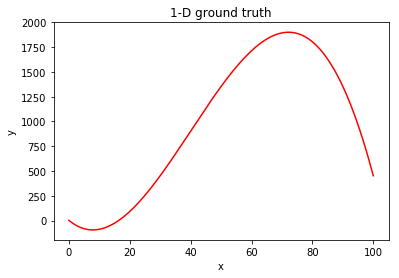

In [2]:
#xs = np.linspace(0,100,200)
xs = np.linspace(0,100,200)
y = [ black_box1D(x) for x in xs ]
plt.plot(xs, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('1-D ground truth')
plt.show()

In [176]:
X,Y = np.mgrid[-3:3:0.05, -3:3:0.05]#.reshape(2, -1).T
Z = black_box2D(X,Y) #[black_box2D(x) for x in xs2]
Z

array([[  6.67128030e-05,   7.99424005e-05,   9.52799236e-05, ...,
          5.73888182e-05,   4.77427244e-05,   3.93881001e-05],
       [  8.65653792e-05,   1.03713466e-04,   1.23594390e-04, ...,
          7.81552889e-05,   6.49465833e-05,   5.35294075e-05],
       [  1.11643444e-04,   1.33731359e-04,   1.59339112e-04, ...,
          1.05833050e-04,   8.78558652e-05,   7.23458622e-05],
       ..., 
       [ -2.49196759e-05,  -3.10463034e-05,  -3.81716348e-05, ...,
          1.85508283e-04,   1.50443598e-04,   1.21316477e-04],
       [ -1.60615999e-05,  -2.00395004e-05,  -2.46366775e-05, ...,
          1.39969215e-04,   1.13462853e-04,   9.14589324e-05],
       [ -9.96954475e-06,  -1.24643688e-05,  -1.53216415e-05, ...,
          1.05100382e-04,   8.51592361e-05,   6.86161390e-05]])

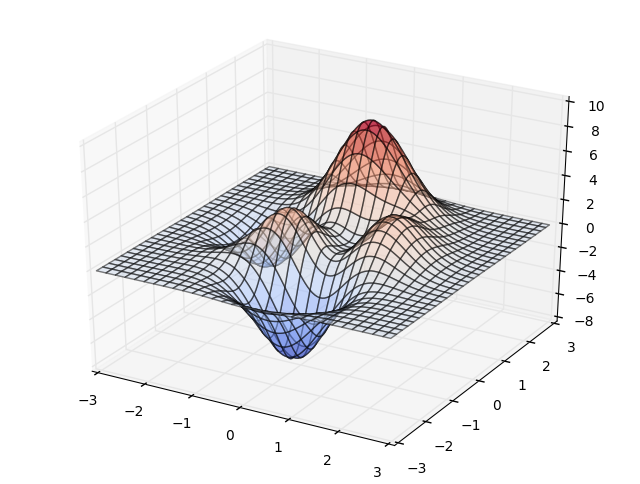

In [142]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
#X, Y = np.meshgrid(xs2[:,0], xs2[:,1])
#plt.plot(xs2[:,0], xs2[:,1], y2)

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.5, cmap=mpl.cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='z', cmap=mpl.cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='x',  cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='y',  cmap=cm.coolwarm)

#ax.set_xlim3d(-pi, 2*pi);
#ax.set_ylim3d(0, 3*pi);
#ax.set_zlim3d(-pi, 2*pi);


## 3. Implement hill climbing

In [3]:
from random import randint

def tweak_1D(solution):
    return solution + np.random.normal(0,3)

def copy_1D(solution):
    r = solution
    return r

def assess_quality_1D(solution):
    return black_box1D(solution)

def hill_climbing_1D(S_1D):
    visited = [S_1D]
    abort = False
    time_amount = 100
    while(abort != True):
        R_1D = tweak_1D(copy_1D(S_1D))
        if (assess_quality_1D(R_1D) > assess_quality_1D(S_1D)):
            S_1D = R_1D
            visited.append(S_1D)
        time_amount = time_amount - 1
        if(time_amount == 0):
            abort = True
    return S_1D, visited

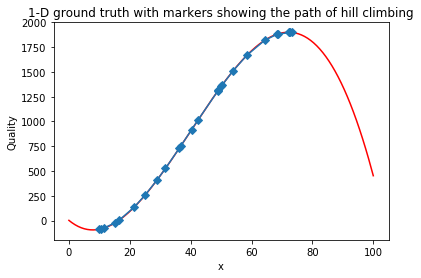

[10, 10.422176037774113, 11.36891698881489, 15.040339153098333, 16.530050647861728, 21.439198186103177, 24.9491414802397, 29.072608914347214, 31.71985877293191, 36.29886812352479, 36.811981311714966, 40.28461824333398, 42.362240063617605, 48.884305392556016, 49.1211221302232, 49.994497554777425, 50.276819991795215, 54.02022596311107, 58.50150962399436, 64.30904206406944, 68.47056375190398, 68.54006638338181, 73.27706355161956, 72.52654898776272, 72.24699711294268, 72.18837488831075]


In [4]:
start_solution = randint(0,100)
best, visited = hill_climbing_1D(start_solution)
plt.plot(xs, y, 'r')
plt.plot(visited, [black_box1D(x) for x in visited], '-D')
plt.xlabel('x')
plt.ylabel('Quality')
plt.title('1-D ground truth with markers showing the path of hill climbing')
plt.show()
print (visited)

# Additional Information

### Gaussian curves / normal distribution

The normal distribution function can be used to control the randomness of tweak operations or the initial candidate generation. With a small standard deviation (sd), there is a higher probability that our tweaked candidate solutions stay closer to the original candidate solution. Increasing sd will cause to make larger changes, on average. So, we will be more explorative.

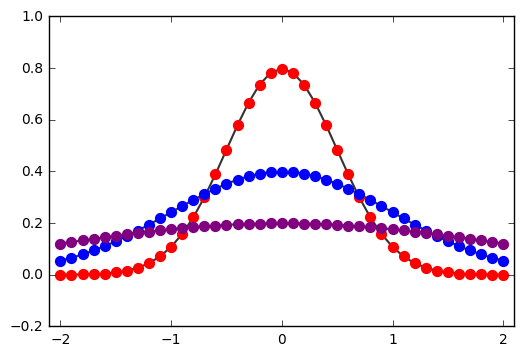

In [173]:
import math
def normal(mu,sigma):
    '''Defining the normal distribution function'''
    def f(x):
        z = 1.0*(x-mu)/sigma
        e = math.e**(-0.5*z**2)
        C = math.sqrt(2*math.pi)*sigma
        return 1.0*e/C
    return f

X = 2
dx = 0.1
R = np.arange(-X,X+dx,dx)

#Generating values of the normal distribution based on different standard deviations
L = list()
sdL = (0.5,1,2,3)
for sd in sdL:
    f = normal(mu=0,sigma=sd)
    L.append([f(x) for x in R])
colors = ['r','b','purple']

#Plot a curve for each standard deviation
for c,P in zip(colors,L):
    plt.plot(R,P,zorder=1,color='0.2',lw=1.5)
    plt.scatter(R,P,zorder=2,s=50,color=c)
    
ax = plt.axes()
ax.set_xlim(-2.1,2.1)
#ax.set_ylim(-0.01,0.5)
plt.savefig('example.png')

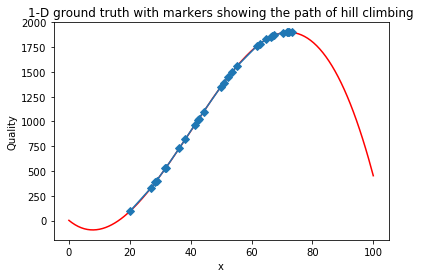

In [5]:
from IPython import display
import time
def pltgraph(ax, colors=['b']):
    #x = np.linspace(0,1,100)
    if ax.lines:
        continueFirst = False
        if len(ax.lines) > 1:
            continueFirst = True
        for line in ax.lines:
            if continueFirst:
                continueFirst = False
                continue
            start_solution = randint(0,100)
            best, visited = hill_climbing_1D(start_solution)
            line.set_xdata(visited)
            y = [black_box1D(x) for x in visited]
            line.set_ydata(y)
    else:
        xs = np.linspace(0,100,200)
        ax.plot(xs, [ black_box1D(x) for x in xs ], 'r')
        for color in colors:
            start_solution = randint(0,100)
            best, visited = hill_climbing_1D(start_solution)
            ax.plot(visited, [black_box1D(x) for x in visited], '-D')
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)

plt.ion()
fig,ax = plt.subplots(1,1)
#plt.plot(xs, y, 'r')
plt.xlabel('x')
plt.ylabel('Quality')
plt.title('1-D ground truth with markers showing the path of hill climbing')

for f in range(15):
    pltgraph(ax, ['b'])
    time.sleep(1)

## Simulated Annealing

In [6]:
import random

def plotSA(ax,  solution, best, colors=['-D','o']):
    if ax.lines:
        continueFirst = False
        ax.lines[1].set_xdata(solution)
        y = [black_box1D(solution)]
        ax.lines[1].set_ydata(y)
        ax.lines[2].set_xdata(best)
        y = [black_box1D(best)]
        ax.lines[2].set_ydata(y)
    else:
        xs = np.linspace(0,100,200)
        ax.plot(xs, [ black_box1D(x) for x in xs ], 'r')
        for color in colors:
            ax.plot(solution, [black_box1D(solution)], color)
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    

def sim_annealing(solution, temperature=0.9, plot=True):
    #plotting... nothing to do with the algorithm
    if plot:
        plt.ion()        
        fig,ax = plt.subplots(1,1)
        plt.xlabel('x')
        plt.ylabel('Quality')
        plt.title('1-D ground truth with markers showing the path of simulated annealing')
        
    best = solution
    best_quality = assess_quality_1D(solution)
    abort = False
    time_steps = 100
    while abort != True:
        quality_solution = assess_quality_1D(best)
        new_solution = tweak_1D(copy_1D(solution))
        quality_new_solution = assess_quality_1D(new_solution)
        
        #Here we change the state from which we explore our neighbors
        random_value = random.uniform(0,1)
        #print((quality_new_solution-quality_solution)/temperature)
        if quality_new_solution > quality_solution or random_value < math.exp((quality_new_solution-quality_solution)/temperature):
            #print(random_value, " < ", math.exp((quality_new_solution-quality_solution)/temperature), random_value < math.exp((quality_new_solution-quality_solution)/temperature))
            solution = new_solution
        temperature = temperature-1
        if(temperature <= 0):
            temperature = 10
        #here we store just the best solution
        if quality_new_solution > best_quality:
            best = new_solution
            best_quality = quality_new_solution   
        if (time_steps <= 0):
            abort = True
        time_steps = time_steps -1
        
        if plot:
            #plotting
            plotSA(ax, solution, best)
            time.sleep(0.1)
    return best

72.21660340518943

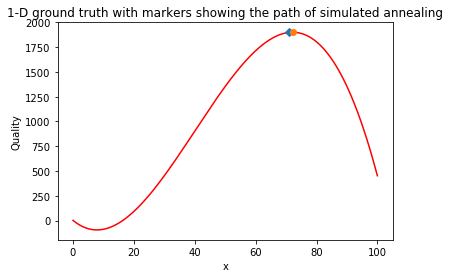

In [9]:
sim_annealing(20, temperature=100)